<a href="https://colab.research.google.com/github/bionca22/Womakers_dataanalytics_semana8/blob/main/Entendendo_os_estudantes_DATA_ANALYTCS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np #manipulação de dados
import seaborn as sns #visualização de dados
import matplotlib.pyplot as plt #visualização de dados
import scipy.stats as stat #biblioteca para estatística


In [ ]:
estudantes_df = pd.read_csv("exams.csv")

In [ ]:
estudantes_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


##1. Leia a base de dados e faça uma análise inicial, como por exemplo,verificar o tamanho da base de dados (quantidade de linhas e colunas) e o tipo das variáveis.


In [ ]:
num_linhas, num_colunas = estudantes_df.shape
tipos_de_variaveis = estudantes_df.dtypes

print("Numero de linhas:", num_linhas)
print("Numero de Colunas:", num_colunas)
display("Tipos de variáveis:", tipos_de_variaveis)

Numero de linhas: 1000
Numero de Colunas: 8


'Tipos de variáveis:'

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

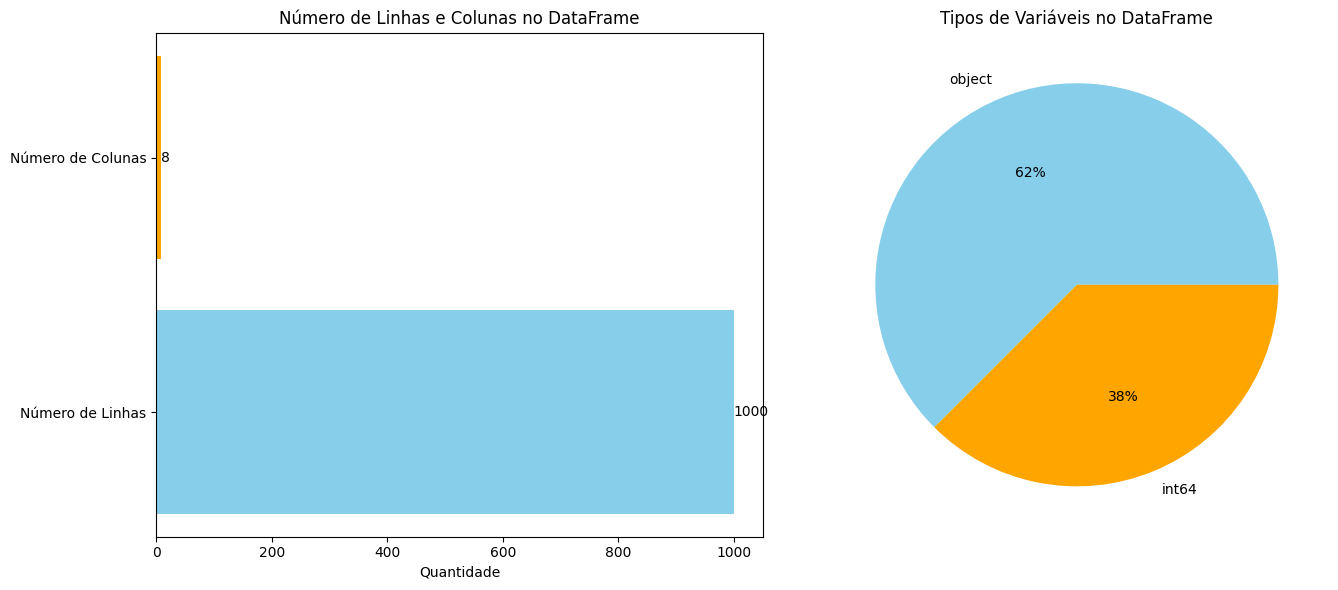

In [ ]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    # Cria o gráfico com dois subplots lado a lado
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de barras para o número de linhas e colunas
axs[0].barh(['Número de Linhas', 'Número de Colunas'], [num_linhas, num_colunas], color=['skyblue', 'orange'])
axs[0].text(num_linhas, 0, str(num_linhas), ha='left', va='center')
axs[0].text(num_colunas, 1, str(num_colunas), ha='left', va='center')
axs[0].set_title('Número de Linhas e Colunas no DataFrame')
axs[0].set_xlabel('Quantidade')

# Gráfico de pizza para os tipos de variáveis
tipos_de_variaveis.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=['skyblue', 'orange'], ax=axs[1])
axs[1].set_title('Tipos de Variáveis no DataFrame')

# Exibe os gráficos
plt.tight_layout()
plt.show()



## 2. Alguma variável precisa ser alterada ou criada? Faça as alterações se julgar necessária.

In [ ]:
#Criação da variável Numérica para calcular a média das notas dos estudantes
estudantes_df['avarage_score'] = estudantes_df[['math score', 'reading score','writing score']].mean(axis=1)
display(estudantes_df.head())

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avarage_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


## 3. Verifique a quantidade de alunos em cada grupo racial/étnico.


In [ ]:
quantidade_por_grupo = estudantes_df['race/ethnicity'].value_counts() #.value_counts():conta o número de ocorrências de cada valor único na série.
display(quantidade_por_grupo)

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

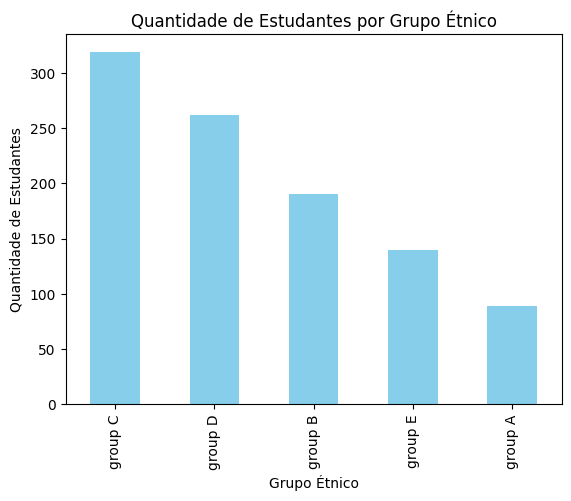

In [ ]:
quantidade_por_grupo.plot(kind='bar', color='skyblue')
plt.xlabel('Grupo Étnico')
plt.ylabel('Quantidade de Estudantes')
plt.title('Quantidade de Estudantes por Grupo Étnico')
plt.show()

## 4. Qual a quantidade de alunos de cada gênero? Existem mais alunos do gênero masculino ou feminino?


In [ ]:
quantidade_por_gender = estudantes_df['gender'].value_counts()
if quantidade_por_gender['male'] > quantidade_por_gender['female']:
  print(f"Existem mais estudantes masculino, totalizando {quantidade_por_gender['male']} de estudantes")
elif quantidade_por_gender['male'] < quantidade_por_gender['female']:
  print(f"Existem mais estudantes femininos, totalizando {quantidade_por_gender['female']} de estudantes")
else:
  print(f"Há o mesmo número de alunos de ambos os gêneros, totalizando {quantidade_por_gender} por estudantes.")


Existem mais estudantes femininos, totalizando 518 de estudantes


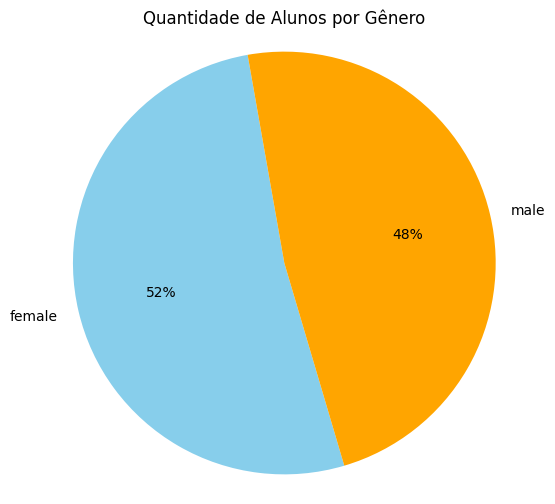

In [ ]:
# Criando o gráfico de pizza
cores = ['skyblue', 'orange']
plt.figure(figsize=(6,6))  # Define o tamanho do gráfico
plt.pie(quantidade_por_gender,labels=quantidade_por_gender.index, autopct='%1.0f%%', startangle=100, colors=cores)
plt.title('Quantidade de Alunos por Gênero')
plt.axis('equal')  # Mantém o gráfico de pizza em forma de círculo

plt.show()

## 5. Analise as notas de matemática dos alunos de forma mais completa possível.

In [ ]:
estudantes_df['math score'].describe()



count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: math score, dtype: float64

In [ ]:
# count: Indica que há 1000 valores de notas de matemática no conjunto de dados,
# o que significa que temos 1000 alunos para os quais as notas de matemática foram registradas.

# mean: A média das notas de matemática é 66.089. Isso sugere que, em média, os
# alunos têm um desempenho um pouco acima de 65 em matemática, numa escala de 0 a 100.

# std: O desvio padrão é 15.16308, indicando a quantidade de variação ou dispersão
# das notas em relação à média. Um desvio padrão maior indica uma maior variação nas notas dos alunos.
# Neste caso, um desvio padrão de aproximadamente 15 pontos sugere uma dispersão moderada em torno da média.

# min: A nota mínima registrada é 0. Isso mostra que pelo menos um aluno teve uma nota
# de matemática muito baixa, possivelmente indicando falta de conhecimento ou outras dificuldades.

# 25%: 25% dos alunos têm notas abaixo de 57. Isso significa que um quarto dos alunos
# obteve notas entre 0 e 57, indicando um desempenho mais baixo.

# 50%: A mediana das notas é 66, o que significa que metade dos alunos tem notas abaixo de 66 e a outra
# metade tem notas acima. A mediana sendo igual à média sugere uma distribuição simétrica das notas.

# 75% : 75% dos alunos têm notas abaixo de 77. Isso indica que a maioria dos alunos (três quartos)
# obteve notas entre 0 e 77, com o último quarto dos alunos obtendo notas mais altas, entre 77 e 100.

# max: A nota máxima é 100, indicando que pelo menos um aluno alcançou a nota máxima possível em matemática.


In [ ]:
# mais gráficos seaborn
sns.set(style="whitegrid")

## Como a nota média de matemática varia de acordo com o nível de escolaridade dos pais:

In [ ]:
media_notas_matematica = estudantes_df.groupby('parental level of education')['math score'].mean().sort_values(ascending=False)

print("Nota média de matemática por grau de escolaridade dos pais:")
print(media_notas_matematica)


# Usamos groupby('parental level of education') para agrupar os dados pelo nível de escolaridade dos pais;
# Depois, aplicamos ['math score'].mean() para calcular a média das notas de matemática dentro de cada grupo de escolaridade e
# sort_values(ascending=False) é usado para ordenar os resultados em ordem decrescente das médias, para que se possa ver facilmente
# quais níveis de escolaridade dos pais têm as maiores médias de notas de matemática.

Nota média de matemática por grau de escolaridade dos pais:
parental level of education
master's degree       69.745763
bachelor's degree     69.389831
associate's degree    67.882883
some college          67.128319
some high school      63.497207
high school           62.137755
Name: math score, dtype: float64


## Distribuição das notas de matemática:

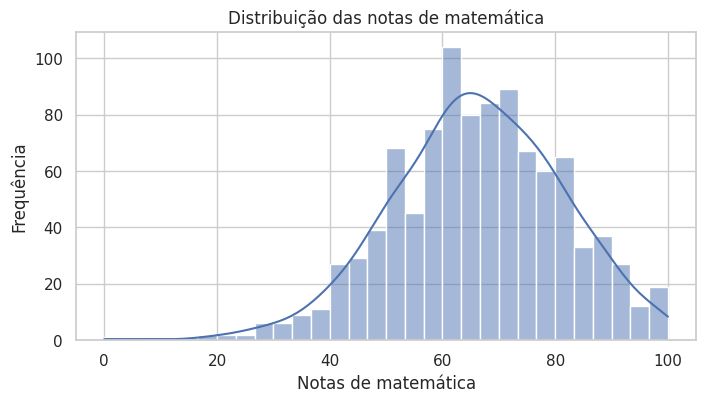

In [ ]:
plt.figure(figsize=(8, 4))

# Histograma das notas de matemática dos alunos
# 'kde=True' adiciona uma linha de Estimativa de Densidade Kernel
# 'bins=30' define o número de barras (bins) do histograma
sns.histplot(estudantes_df['math score'], kde=True, bins=30)

plt.title('Distribuição das notas de matemática')

plt.xlabel('Notas de matemática')

plt.ylabel('Frequência')

plt.show()

# O gráfico mostra a forma geral da distribuição das notas

# A localização do pico (ou picos) do KDE pode dar uma indicação
# visual de onde se concentram as notas de matemática, sugerindo a tendência central dos dados.

## Distribuição das notas de matemática por gênero:

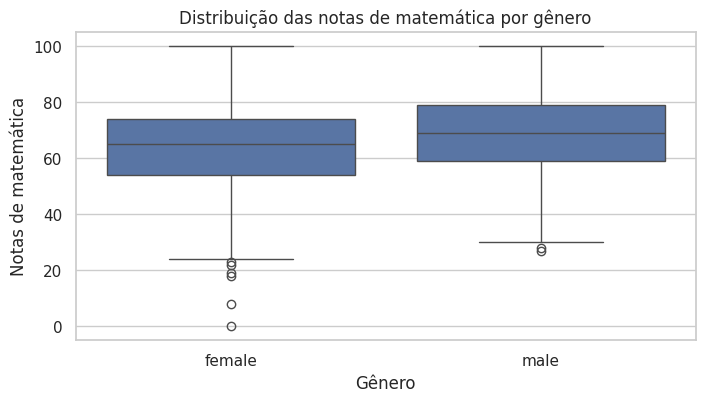

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='gender', y='math score', data=estudantes_df)
plt.title('Distribuição das notas de matemática por gênero')
plt.xlabel('Gênero')
plt.ylabel('Notas de matemática')
plt.show()


## Distribuição das notas de matemática por grupo étnico:

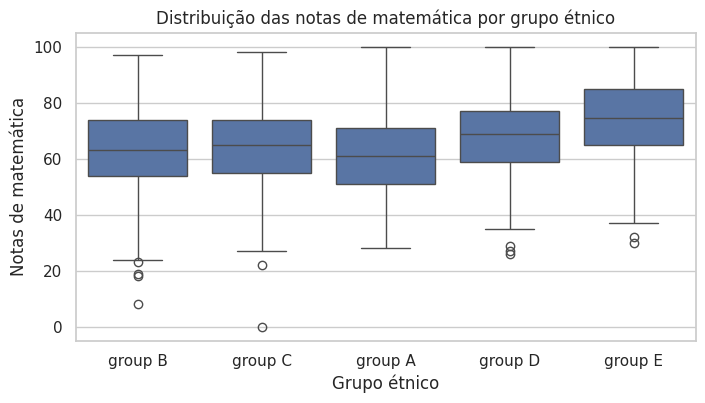

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='race/ethnicity', y='math score', data=estudantes_df)
plt.title('Distribuição das notas de matemática por grupo étnico')
plt.xlabel('Grupo étnico')
plt.ylabel('Notas de matemática')
plt.show()


## Influência da preparação para o teste:

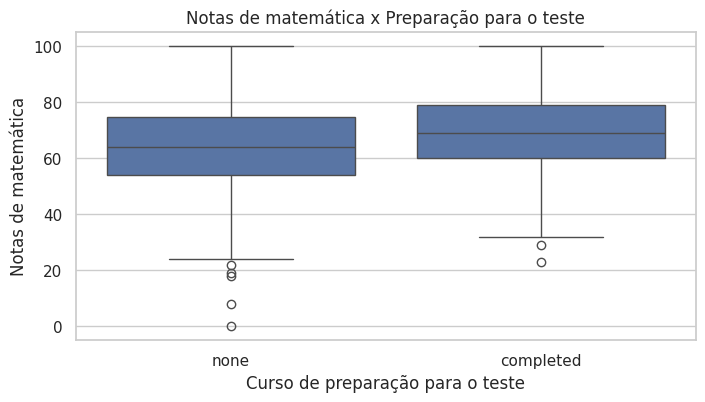

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='test preparation course', y='math score', data=estudantes_df)
plt.title('Notas de matemática x Preparação para o teste')
plt.xlabel('Curso de preparação para o teste')
plt.ylabel('Notas de matemática')
plt.show()

## Como as notas de leitura e escrita variam de acordo com o nível de escolaridade dos pais:

In [ ]:
# Calcular a média das notas de leitura por nível de escolaridade dos pais:
media_notas_leitura = estudantes_df.groupby('parental level of education')['reading score'].mean().sort_values(ascending=False)


print("Nota média de leitura por grau de escolaridade dos pais:")
print(media_notas_leitura)
print()  # Linha em branco para separar os resultados

# Calcular a média das notas de escrita por nível de escolaridade dos pais:
media_notas_escrita = estudantes_df.groupby('parental level of education')['writing score'].mean().sort_values(ascending=False)

print("Nota média de escrita por grau de escolaridade dos pais:")
print(media_notas_escrita)

# Agrupamos os dados pela coluna 'parental level of education' e calculamos a média da coluna 'reading score' para obter
# as médias das notas de leitura por nível de escolaridade dos pais; Depois, repetimos o processo para a coluna 'writing score'
# para obter as médias das notas de escrita.
# Usamos sort_values(ascending=False) para ordenar os resultados, colocando os maiores valores de média no topo, facilitando a
# identificação de quais níveis de escolaridade dos pais estão associados às maiores médias de notas em leitura e escrita.

Nota média de leitura por grau de escolaridade dos pais:
parental level of education
master's degree       75.372881
bachelor's degree     73.000000
associate's degree    70.927928
some college          69.460177
some high school      66.938547
high school           64.704082
Name: reading score, dtype: float64

Nota média de escrita por grau de escolaridade dos pais:
parental level of education
master's degree       75.677966
bachelor's degree     73.381356
associate's degree    69.896396
some college          68.840708
some high school      64.888268
high school           62.448980
Name: writing score, dtype: float64


## Relação entre as notas de leitura e escrita

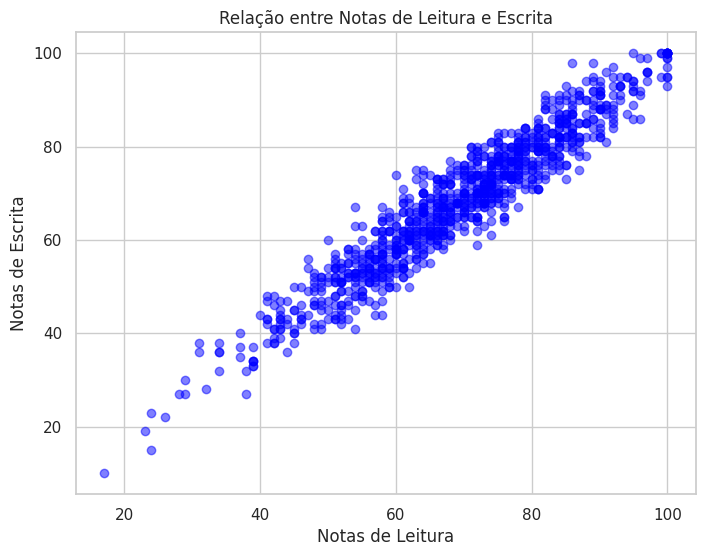

In [ ]:
# Supondo que 'df' seja o DataFrame contendo as notas de leitura e escrita
notas_leitura = estudantes_df['reading score']
notas_escrita = estudantes_df['writing score']

# Criando o gráfico de dispersão
plt.figure(figsize=(8, 6))
plt.scatter(notas_leitura, notas_escrita, color='blue', alpha=0.5)

# Adicionando rótulos e título
plt.xlabel('Notas de Leitura')
plt.ylabel('Notas de Escrita')
plt.title('Relação entre Notas de Leitura e Escrita')

# Exibindo o gráfico
plt.grid(True)
plt.show()


# Relação de desempenho entre grupos étnicos

In [ ]:
# 1 pegar as medias de notas em Mat  2- pego os tipos de grupo etnico 3-faço a correlação ente grupo etico e nota de mat. 4- ordeno do maior para o menor 5- faço um grafico de barras
estudantes_df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avarage_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [ ]:
#1-grupado por raça/ etinia as notas de :matemática, Leitura, Escrita e média global. Cada variavel armazena uma média da relação nota/raça, ordenada em ordem decrescente.
media_notas_mat_grupo_etnicos = estudantes_df.groupby('race/ethnicity')['math score'].mean().sort_index(ascending= False)
media_notas_leitura_grupo_etnicos = estudantes_df.groupby('race/ethnicity')['reading score'].mean().sort_index(ascending= False)
media_notas_escrita_grupo_etnicos = estudantes_df.groupby('race/ethnicity')['writing score'].mean().sort_index(ascending= False)
media_notas_grupo_etnicos = estudantes_df.groupby('race/ethnicity')['avarage_score'].mean().sort_index(ascending= False)

#2- Mostrando as variáveis
print('média de Matemática por grupo etnicos :', media_notas_mat_grupo_etnicos)
print('média de Leitura por grupo etnicos :', media_notas_leitura_grupo_etnicos)
print('média de Escrita por grupo etnicos :', media_notas_escrita_grupo_etnicos)
print('média de geral por grupo etnicos :', media_notas_grupo_etnicos)




média de Matemática por grupo etnicos : race/ethnicity
group E    73.821429
group D    67.362595
group C    64.463950
group B    63.452632
group A    61.629213
Name: math score, dtype: float64
média de Leitura por grupo etnicos : race/ethnicity
group E    73.028571
group D    70.030534
group C    69.103448
group B    67.352632
group A    64.674157
Name: reading score, dtype: float64
média de Escrita por grupo etnicos : race/ethnicity
group E    71.407143
group D    70.145038
group C    67.827586
group B    65.600000
group A    62.674157
Name: writing score, dtype: float64
média de geral por grupo etnicos : race/ethnicity
group E    72.752381
group D    69.179389
group C    67.131661
group B    65.468421
group A    62.992509
Name: avarage_score, dtype: float64


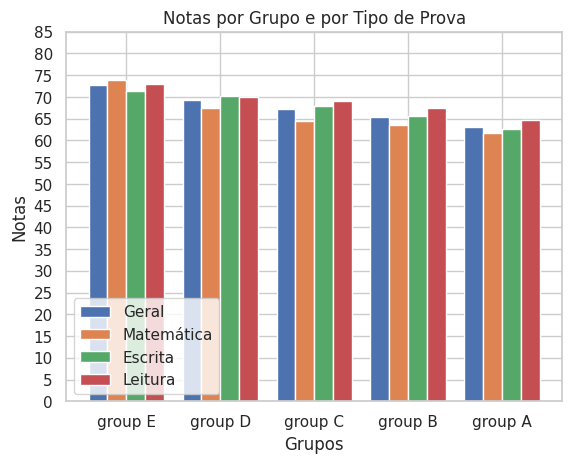

In [ ]:
# Configurando a largura das barras
largura_barra = 0.2

#grupos etnicos
grupos = media_notas_grupo_etnicos.index

# Definindo os quadrantes para cada tipo de nota
quadrante_grupos = np.arange(len(grupos))

# Plotando as barras para cada grupo e cada tipo de nota
plt.bar(quadrante_grupos, media_notas_grupo_etnicos, largura_barra, label='Geral')
plt.bar(quadrante_grupos + largura_barra, media_notas_mat_grupo_etnicos, largura_barra, label='Matemática')
plt.bar(quadrante_grupos + 2*largura_barra,media_notas_escrita_grupo_etnicos, largura_barra, label='Escrita')
plt.bar(quadrante_grupos + 3* largura_barra,media_notas_leitura_grupo_etnicos, largura_barra, label='Leitura')


#legendas
plt.xlabel('Grupos')
plt.ylabel('Notas')
plt.title('Notas por Grupo e por Tipo de Prova')
plt.xticks(quadrante_grupos + 1.5 * largura_barra, grupos)
plt.legend(loc='lower left')


# Ajustar tamanho do eixo y para 15 em 15
plt.yticks(np.arange(0, max(media_notas_grupo_etnicos) + 15, 5))


plt.show()


## Análises gráficas

### 1.Nota média de matemática dos alunos segundo o grau de escolaridade dos pais

Text(0.5, 0, 'Média das notas')

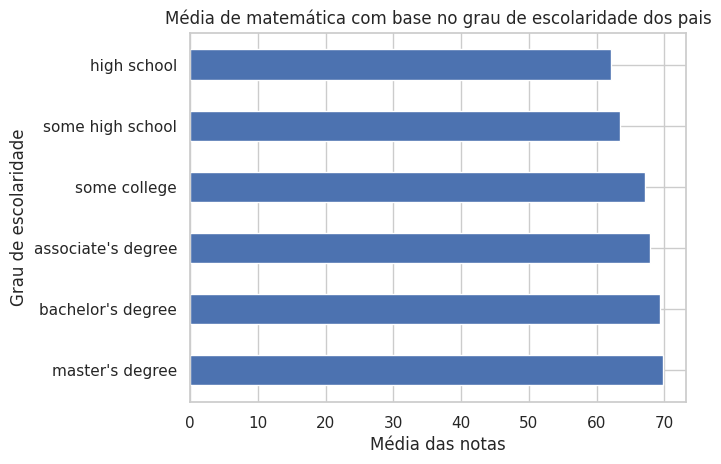

In [ ]:
'''
variável criada que tem a informação das notas de matemática com escolaridade dos pais: media_notas_matematica

.index para mostrar os índeces na xlabel
.values para ligar os valores das médias no ylabel
'''
plt.barh(media_notas_matematica.index, media_notas_matematica.values, height = 0.5)
plt.title('Média de matemática com base no grau de escolaridade dos pais')
plt.ylabel('Grau de escolaridade')
plt.xlabel('Média das notas')

### 2.Nota média de leitura dos alunos segundo o grau de escolaridade dos pais

Text(0.5, 0, 'Média das notas')

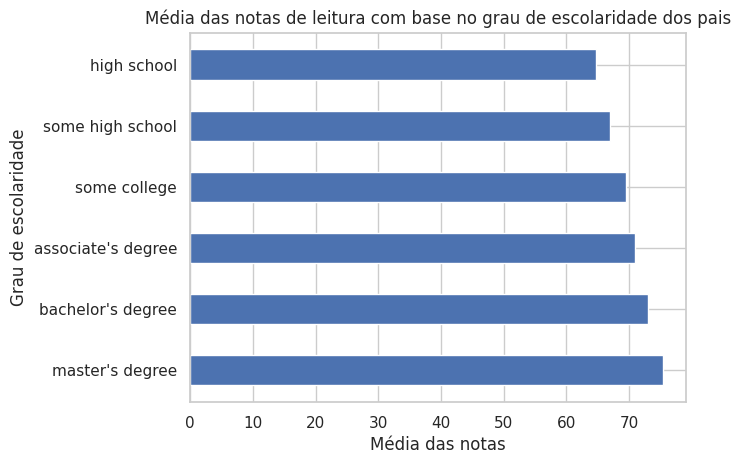

In [ ]:
'''
variável criada que tem a informação das notas de leitura com escolaridade dos pais: media_notas_leitura

.index para mostrar os índeces na xlabel
.values para ligar os valores das médias no ylabel
'''
plt.barh(media_notas_leitura.index, media_notas_leitura.values, height = 0.5)
plt.title('Média das notas de leitura com base no grau de escolaridade dos pais')
plt.ylabel('Grau de escolaridade')
plt.xlabel('Média das notas')

### 3.Nota média de escrita dos alunos segundo o grau de escolaridade dos pais

Text(0.5, 0, 'Média das notas')

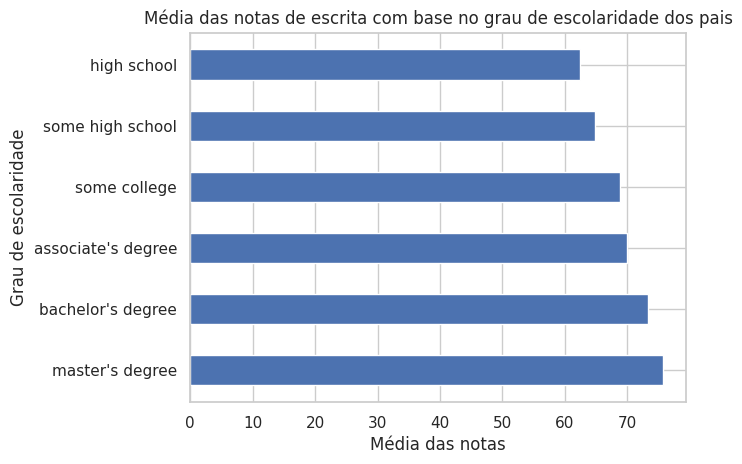

In [ ]:
'''
variável criada que tem a informação das notas de escrita com escolaridade dos pais: media_notas_escrita

.index para mostrar os índeces na xlabel
.values para ligar os valores das médias no ylabel
'''
plt.barh(media_notas_escrita.index, media_notas_escrita.values, height = 0.5)
plt.title('Média das notas de escrita com base no grau de escolaridade dos pais')
plt.ylabel('Grau de escolaridade')
plt.xlabel('Média das notas')


# Relação entre Curso preparatório para o teste e Grupos Étnicos








In [ ]:

# Calculando o total de pessoas em cada raça/etnia
total_por_raca = estudantes_df.groupby('race/ethnicity').size()

# Contagem do número de estudantes para cada combinação de raça/etnia e curso de preparação para o teste
contagem = estudantes_df.groupby(['race/ethnicity', 'test preparation course']).size().reset_index(name='Contagem')

# Mesclando a contagem com o total por raça
contagem = contagem.merge(total_por_raca.rename('Total'), left_on='race/ethnicity', right_index=True)

# Calculando a porcentagem de cada grupo de preparação para o teste dentro de cada raça/etnia
contagem['Porcentagem'] = (contagem['Contagem'] / contagem['Total']) * 100

print(contagem)

  race/ethnicity test preparation course  Contagem  Total  Porcentagem
0        group A               completed        31     89    34.831461
1        group A                    none        58     89    65.168539
2        group B               completed        68    190    35.789474
3        group B                    none       122    190    64.210526
4        group C               completed       117    319    36.677116
5        group C                    none       202    319    63.322884
6        group D               completed        82    262    31.297710
7        group D                    none       180    262    68.702290
8        group E               completed        60    140    42.857143
9        group E                    none        80    140    57.142857


In [ ]:
# Agrupar os dados pelo grupo étnico e pela variável "test preparation course",
# e contar o número de alunos em cada combinação de grupo étnico e curso de preparação para a prova.
curso_por_grupo_etnico = estudantes_df.groupby(['race/ethnicity', 'test preparation course']).size().unstack()

# Exibir o resultado, que mostrará o número de alunos que fazem e não fazem o curso
display(curso_por_grupo_etnico)

test preparation course,completed,none
race/ethnicity,,
group A,31,58
group B,68,122
group C,117,202
group D,82,180
group E,60,80


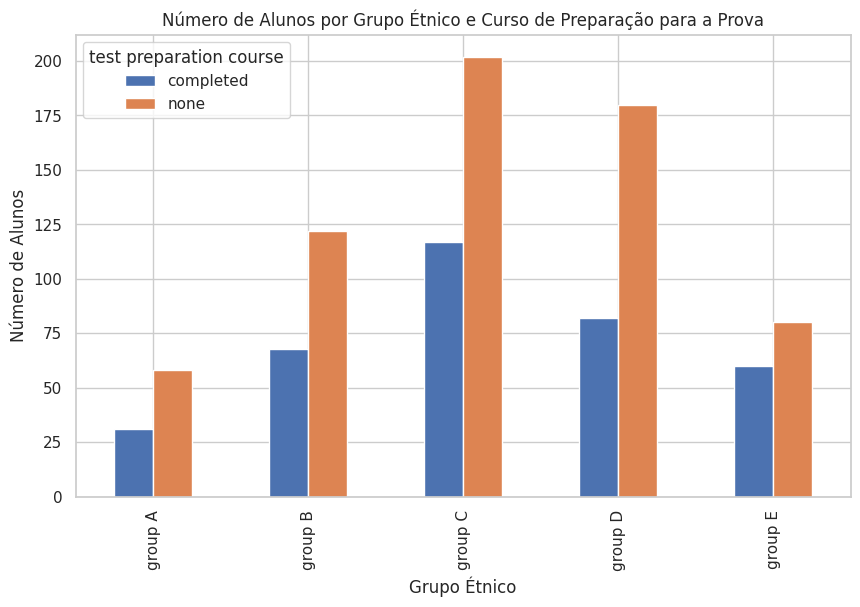

In [ ]:

curso_por_grupo_etnico.plot(kind='bar', figsize=(10, 6))

plt.title('Número de Alunos por Grupo Étnico e Curso de Preparação para a Prova')
plt.xlabel('Grupo Étnico')
plt.ylabel('Número de Alunos')


plt.show()

Na análise da correlação entre o número de alunos por grupo étnico que concluíram o curso preparatório, observamos algumas tendências interessantes. O grupo A apresentou o menor número de alunos que completaram o curso preparatório, enquanto o grupo E teve o segundo menor número de alunos que o concluíram, com uma quantidade ainda menor em comparação com o grupo A. Por outro lado, os grupos C e D registraram os maiores volumes de alunos que concluíram o curso preparatório. No entanto, também é importante notar que esses grupos apresentam um número significativo de alunos que não fizeram o curso preparatório.

Esses resultados sugerem que os grupos C e D têm um desempenho superior em termos de conclusão do curso preparatório, o que pode estar associado a uma maior probabilidade de obterem melhores notas. No entanto, é crucial considerar outros fatores, como o desempenho acadêmico geral dos alunos, para uma avaliação mais abrangente.

# Conferência de outliers

In [ ]:
from scipy import stats ## pacote de estatística que contém a função z score

In [ ]:
def find_outlier_zscore(dataset, threshold, colname):
    # Função que calcula a quantidade de outliers encontrados dado o nome do dataframe, o threshold e o nome da coluna
    # Calcula a média e o desvio padrão da coluna especificada
    df = dataset[colname]
    outliers = []
    zscore = []
    threshold = threshold
    mean = np.mean(df)
    std = np.std(df)
    # Itera sobre os valores da coluna para calcular os Z-scores e identificar os outliers
    for i in df.values:
        z_score = (i - mean) / std  # Calcula o Z-score
        zscore.append(z_score)  # Adiciona o Z-score à lista
        if np.abs(z_score) > threshold:  # Verifica se o Z-score excede o threshold
            outliers.append(i)  # Se sim, adiciona o valor à lista de outliers
    print("Número de outliers encontrados em {} foi de: ".format(colname), len(outliers))  # Imprime o número de outliers encontrados
    return zscore, outliers  # Retorna os Z-scores e a lista de outliers



Número de outliers encontrados em math score foi de:  4
Número de outliers encontrados em reading score foi de:  4
Número de outliers encontrados em writing score foi de:  4
Número de outliers encontrados em avarage_score foi de:  4


<Figure size 1000x500 with 0 Axes>

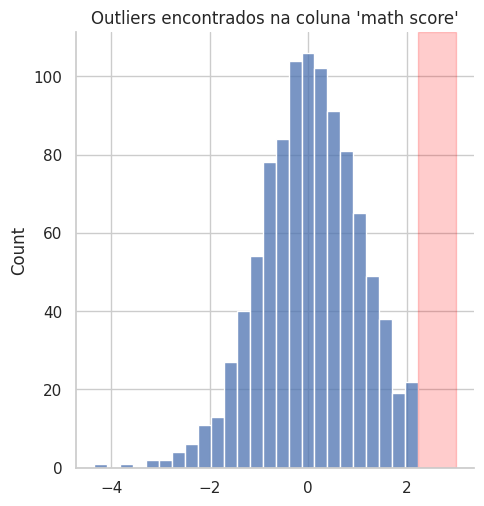

<Figure size 1000x500 with 0 Axes>

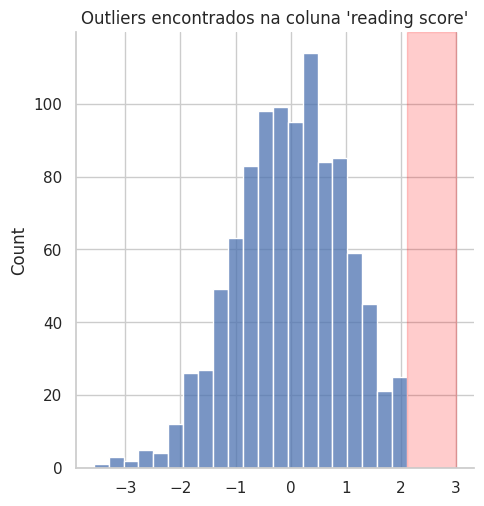

<Figure size 1000x500 with 0 Axes>

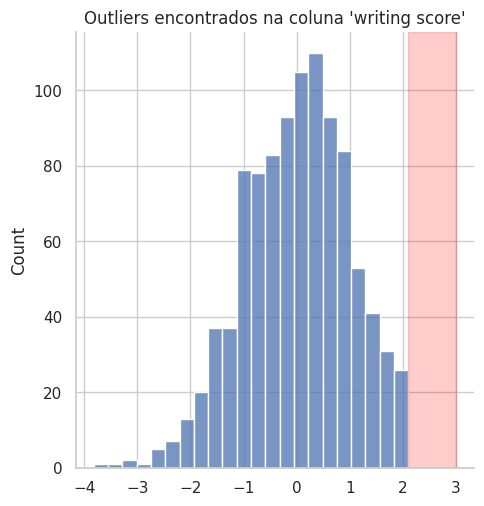

<Figure size 1000x500 with 0 Axes>

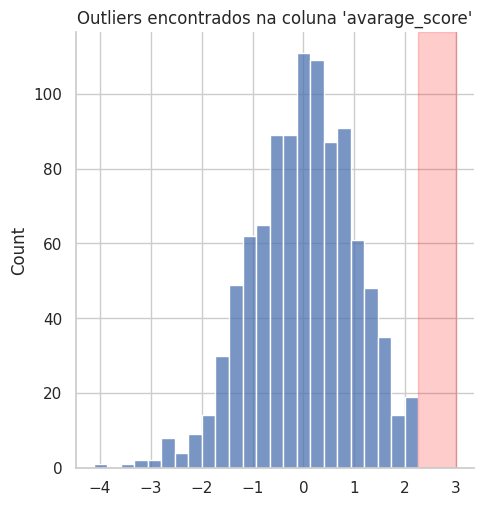

In [ ]:
# Itera sobre as colunas numéricas do DataFrame para identificar outliers em cada uma
for column in estudantes_df.select_dtypes(include=np.number).columns:
    zscore, out = find_outlier_zscore(estudantes_df, 3, column)  # Chama a função para calcular outliers
    if len(out) > 0:  # Verifica se foram encontrados outliers
        plt.figure(figsize=(10, 5))  # Cria uma nova figura para o gráfico
        sns.displot(zscore)  # Plota o histograma dos Z-scores
        # Adiciona uma faixa destacada para os valores considerados outliers
        plt.axvspan(xmin=3, xmax=max(zscore), alpha=0.2, color='red')
        plt.title("Outliers encontrados na coluna '{}'".format(column))  # Define o título do gráfico

# ter almoçado ou não interfere no desempenho da nota?

In [ ]:
lunch_counts = estudantes_df['lunch'].value_counts()

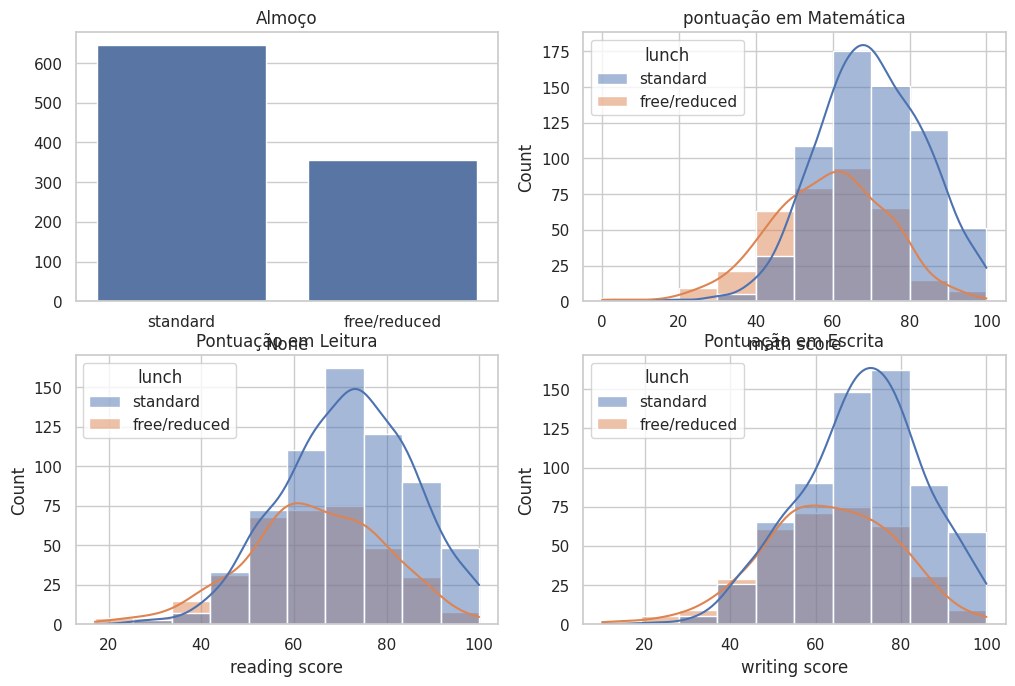

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

#número de pessoas que almoçaram vs não almoçaram
sns.barplot(x=lunch_counts.index, y=lunch_counts.values, ax=axs[0, 0])
axs[0, 0].set_title('Almoço')

#math score
sns.histplot(data=estudantes_df, x="math score", hue="lunch", kde=True, bins=10, ax=axs[0, 1])
axs[0, 1].set_title('pontuação em Matemática')

#reading score
sns.histplot(data=estudantes_df, x="reading score", hue="lunch", kde=True, bins=10, ax=axs[1, 0])
axs[1, 0].set_title('Pontuação em Leitura')

#writing score
sns.histplot(data=estudantes_df, x="writing score", hue="lunch", kde=True, bins=10, ax=axs[1, 1])
axs[1, 1].set_title('Pontuação em Escrita')

plt.subplots_adjust(top=0.85)
plt.show()

In [ ]:
lunch_counts = estudantes_df['lunch'].value_counts()

media_matematica = estudantes_df.groupby("lunch")["math score"].mean().reset_index()

media_leitura = estudantes_df.groupby("lunch")["reading score"].mean().reset_index()

media_escrita = estudantes_df.groupby("lunch")["writing score"].mean().reset_index()

Text(0.5, 1.0, 'Pontuação em Escrita')

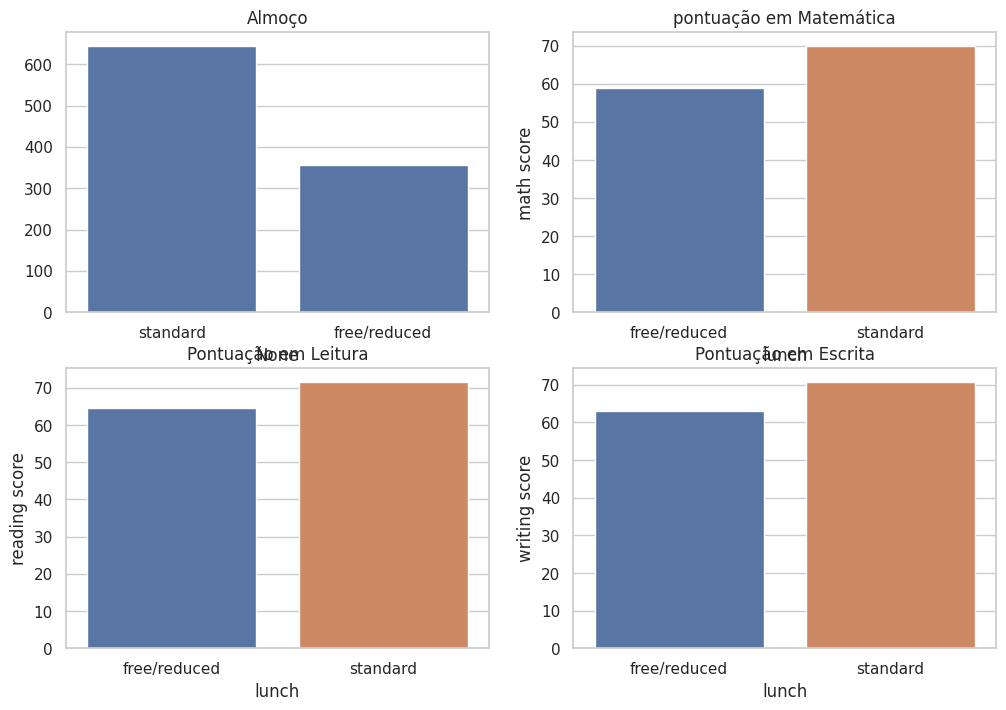

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

sns.barplot(x=lunch_counts.index, y=lunch_counts.values,  ax=axs[0, 0])
axs[0, 0].set_title('Almoço')

sns.barplot(data = media_matematica, x="lunch", y="math score", hue="lunch", ax=axs[0, 1])
axs[0, 1].set_title('pontuação em Matemática')

sns.barplot(data = media_leitura, x="lunch", y="reading score", hue="lunch",ax=axs[1, 0])
axs[1, 0].set_title('Pontuação em Leitura')

sns.barplot(data = media_escrita, x="lunch", y="writing score", hue="lunch", ax=axs[1, 1])
axs[1, 1].set_title('Pontuação em Escrita')
